In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [3]:
csv_path = 'testExportV2.csv'
video_name = 'EUDs1Front' #  Front Left Right
#video_path = 'inference/input_dir_video/Paula_vid_full/'+video_name+'.mp4'  
video_path = 'inference/'+video_name+'/'+video_name+'.mp4'
vcap = cv2.VideoCapture(video_path)
count = 0
frame = 78
while vcap.isOpened():
    nx = vcap.get(cv2.CAP_PROP_FRAME_WIDTH)
    ny = vcap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    success,image = vcap.read()
    if count==frame: 
        cv2.imwrite('inference/'+video_name+'/frame'+str(frame)+'.png', image)     # save frame as PNG file      
        break
    count+=1
    


In [8]:
video_path

'inference/EUDs2Front/EUDs2Front.mp4'

In [15]:
#### we look througth the center ??? ###

fov = 10   ##vertical fov ????? 
n = 10 
f = 10000 

t = n* np.tan(np.deg2rad(fov/2.)) #convert from degrees to rad     #top
r = (nx/ny)*t  #right

b = -t #bottom
l = -r #left

height = t-b
width = r-l

#print (" Camvas top : ",t )
#print (" Camvas bottom : ",b )
#print (" Camvas right ",r )
#print (" Camvas left : ",l )

In [16]:
start = np.array([-27, 1200, 280])   # camera position - frontview
#start = np.array([743, -69, 230])   # camera position - rightview
#start = np.array([-743, -69, 230])   # camera position - left view
to  = np.array([-0.45, 0.31, 110])     # look_at point

gaze = np.subtract(to,start) 
#print ('gaze:',gaze)
w = np.divide(-gaze,np.linalg.norm(gaze))

#print ('w: ',w)
#up_vec = np.array([0,0,1]) 
up_vec = np.array([0.0038895, -0.0926873, 0.995688])
#print ('up_vec:',up_vec)

u = np.cross(up_vec,w)
u=np.divide(u,np.linalg.norm(u))
#print (np.linalg.norm(u))

v = np.cross(w,u)

np.append(u,0)
np.append(v,0)
np.append(w,0)
np.append(start,1)

#print ('u:',u)
#print ('v:',v)

Mcam2world = np.column_stack((np.append(u,0),np.append(v,0),np.append(w,0),np.append(start,1)))
#print ('Mcam2world: \n',Mcam2world) 

Mworld2cam = np.linalg.inv(Mcam2world)
#print ('Mworld2cam: \n',Mcam2world) 

Mper = np.array([[2*n/(r-l),0,0,0],[0,2*n/(t-b),0,0],[0,0,-(f+n)/(f-n),-2*f*n/(f-n)],[0,0,-1,0]])

Mvp = np.array([[nx/2,0,0,(nx-1)/2],[0,ny/2,0,(ny-1)/2],[0,0,1,0],[0,0,0,1]])

In [17]:
Mworld2cam.round()

array([[-1.000e+00, -0.000e+00,  0.000e+00, -1.000e+00],
       [ 0.000e+00, -0.000e+00,  1.000e+00, -1.090e+02],
       [-0.000e+00,  1.000e+00,  0.000e+00, -1.228e+03],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00]])

In [18]:
Mcam2world

array([[-9.99747803e-01,  4.94293438e-03, -2.19065595e-02,
        -2.70000000e+01],
       [-2.23832807e-02, -1.40192706e-01,  9.89871201e-01,
         1.20000000e+03],
       [ 1.82172852e-03,  9.90111899e-01,  1.40267989e-01,
         2.80000000e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [19]:
from scipy.spatial.transform import Rotation as R
r = R.from_matrix(Mcam2world[:3,:3])
quaternion = r.as_quat()
quaternion

array([-0.00665045,  0.65560794,  0.75501796, -0.0090482 ])

In [20]:
df_org = pd.read_csv(csv_path) 
df = df_org.iloc[:,2:]
df_cam = df.copy(deep=True)
df_raster = df.copy(deep=True)


In [21]:
df_org

,frame,seconds,leftfemurX,leftfemurY,leftfemurZ,rightfemurX,rightfemurY,rightfemurZ,waistX,waistY,...,neckZ,headbaseX,headbaseY,headbaseZ,sphnosetipX,sphnosetipY,sphnosetipZ,sphheadtopX,sphheadtopY,sphheadtopZ
0,0,0.000,-12.77,-0.14,113.91,12.77,-0.14,113.91,0.00,0.00,...,171.80,0.03,0.00,177.70,-0.08,17.38,188.21,-0.08,5.88,209.71
1,1,0.033,-12.77,-0.14,113.92,12.77,-0.14,113.91,0.01,0.01,...,171.80,0.13,0.18,177.70,0.06,17.56,188.20,0.21,6.08,209.70
2,2,0.067,-12.77,-0.14,113.92,12.77,-0.14,113.91,0.01,0.02,...,171.80,0.21,0.34,177.70,0.21,17.73,188.19,0.51,6.25,209.70
3,3,0.100,-12.77,-0.14,113.92,12.77,-0.14,113.90,0.01,0.03,...,171.79,0.30,0.52,177.70,0.34,17.92,188.17,0.78,6.46,209.69
4,4,0.133,-12.77,-0.14,113.93,12.77,-0.14,113.90,0.02,0.04,...,171.79,0.39,0.69,177.70,0.50,18.10,188.16,1.08,6.65,209.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,1.867,-12.77,-0.14,113.92,12.77,-0.13,113.91,0.00,0.07,...,171.79,0.08,1.08,177.69,-0.08,18.55,188.03,0.33,7.26,209.64
57,57,1.900,-12.77,-0.14,113.91,12.77,-0.13,113.91,0.00,0.05,...,171.79,-0.04,0.81,177.70,-0.29,18.28,188.06,-0.09,6.96,209.65
58,58,1.933,-12.77,-0.14,113.91,12.77,-0.13,113.92,0.00,0.04,...,171.79,-0.16,0.56,177.70,-0.51,18.01,188.08,-0.51,6.67,209.66
59,59,1.967,-12.77,-0.14,113.91,12.77,-0.14,113.92,-0.01,0.02,...,171.80,-0.27,0.31,177.70,-0.69,17.75,188.10,-0.89,6.38,209.67


In [23]:
dfr = df_org.iloc[:,2:]   #raster space 
dfc = df_org.iloc[:,2:]   #camera space

for r in df.index:    
    for c in range(0,len(df.columns),3):
        Xcor = dfr.iloc[r,c]
        Ycor =  dfr.iloc[r,c+1]
        Zcor =  dfr.iloc[r,c+2]   
        
        Pworld = np.array([Xcor,Ycor,Zcor,1])  # homogeneous cords of selected joint
        #print (Pworld)
        Pcam = np.dot(Mworld2cam,Pworld)
        dfc.iloc[r,c] = Pcam[0]
        dfc.iloc[r,c+1] = Pcam[1] # + 55.378029  # make hip be origin 
        dfc.iloc[r,c+2 ] = Pcam[2] # + 641.291799  # make hip be origin 
        
        Praster =  np.dot(Mvp,np.dot(Mper,Pcam))
        #print (Praster)
        
        Praster = Praster/Praster[-1] # from homogeneous to cartesian coordinates
        #print (Praster)
        dfr.iloc[r,c] = Praster[0]
        dfr.iloc[r,c+1] = ny-Praster[1] 
        dfr.iloc[r,c+2 ] = Praster[2]
        
    
        #break
    #break
df_cam[dfc.columns] = dfc   #data transformed in camera space
df_raster[dfr.columns] = dfr  #data transformed in raster space (pixel)

df_cam.to_csv(video_path[:-4]+'_Camspace.csv',index=False)
df_raster.to_csv(video_path[:-4]+'_Rasterspace.csv',index=False)


In [24]:
rshoulder_paula = df_cam.loc[0,['rightshoulderX','rightshoulderY','rightshoulderZ']].to_numpy()


lshoulder_paula = df_cam.loc[0,['leftshoulderX','leftshoulderY','leftshoulderZ']].to_numpy()
lshoulder_paula

array([   17.93945202,    55.58528536, -1202.95262243])

In [24]:
p1 = df_raster.loc[0,['rightshoulderX','rightshoulderY','rightshoulderZ']].to_numpy()
print (p1)



[227.9024535  187.39243666   0.98538405]


Size of: 800 x 600


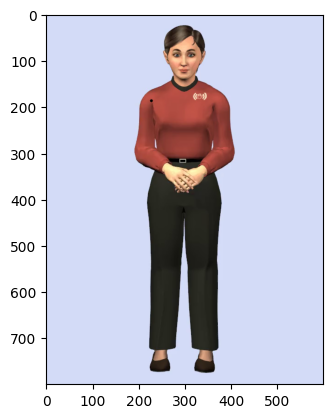

In [25]:
img = cv2.imread("frame0.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print ('Size of:',img.shape[0],'x',img.shape[1])
#plt.imshow(img)
#plt.show()

def draw_point(img, xPixel, yPixel):
    cimg = img.copy()
    start_point = (xPixel, yPixel)
    end_point = (xPixel, yPixel)
    #print (start_point)

    # Black color in BGR
    color = (0, 0, 0)

    # Line thickness of 9 px
    thickness = 5
    img = cv2.line(img, start_point, end_point, color, thickness)
    plt.imshow(img)


draw_point(img,int(np.floor(p1[0])),int(np.floor(p1[1])))


## Openpose Output 

In [ ]:
import json
  
# Opening JSON file
f = open('testMultipleViewsFront_000000000000_keypoints.json')
img = cv2.imread("frame0.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
# returns JSON object as 
# a dictionary
data = json.load(f)
font = cv2.FONT_HERSHEY_SIMPLEX  
fontScale = 1
color = (255, 0, 0)
# Iterating through the json
# list
for ind, i in enumerate(data['part_candidates'][0]):    
    p1 = data['part_candidates'][0][i]  
    if p1:    
        org =(int(np.floor(p1[0])),int(np.floor(p1[1])))
        image = cv2.putText(img, str(ind), org, font,fontScale,color, thickness=2) 
        draw_point(image,int(np.floor(p1[0])),int(np.floor(p1[1])))    

plt.figure(figsize = (30,15))
#plt.imshow(image)
    #draw_point(img,int(np.floor(p1[0])),int(np.floor(p1[1])))    
f.close()

## Our data

In [ ]:
img = cv2.imread("frame0.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gen_cols = [df_raster.columns[i][:-1] for i in range (2,len(df_raster.columns[:-1]),3)]
for ind, c in enumerate (gen_cols):
    p1 = [df_raster.loc[0,c+'X'],df_raster.loc[0,c+'Y']]
    if p1:    
        org =(int(np.floor(p1[0])),int(np.floor(p1[1])))
        image = cv2.putText(img, c, org, font,fontScale,color, thickness=2) 
        draw_point(image,int(np.floor(p1[0])),int(np.floor(p1[1])))    

plt.figure(figsize = (30,15))
#plt.imshow(image,)
plt.show()

In [ ]:
body_keypoints = {'5':'leftshoulder','6':'rightshoulder', '7':'leftelbow','8':'rightelbow','9':'leftwrist','10':'rightwrist','11':'lefthip','12':'righthip','17':'headbase'}

In [ ]:
def midpoint(p1, p2):
    return [(p1[0]+p2[0])/2, (p1[1]+p2[1])/2]

In [ ]:
dict_bkps_openpose = {}
for b in body_keypoints :
    dict_bkps_openpose[body_keypoints[b]] = data['part_candidates'][0][b][0:2]
dict_bkps_openpose['hips'] = midpoint(dict_bkps_openpose['lefthip'],dict_bkps_openpose['righthip'])
del dict_bkps_openpose['righthip']
del dict_bkps_openpose['lefthip']

In [ ]:
dict_bkps_gt = {}
for i in dict_bkps_openpose:
    dict_bkps_gt[i] = [df_raster.loc[0,i+'X'],df_raster.loc[0,i+'Y']]
#dict_bkps_gt['headbase'] = [df_raster.loc[0,'headbaseX'],df_raster.loc[0,'headbaseY']]

In [ ]:
data['part_candidates']

In [ ]:
dict_bkps_openpose

In [ ]:
dict_bkps_gt

# Draw skeleton for each frame

In [ ]:
parents = {'hips':[ 'waist',],
           'rightwrist':['rightelbow'],
           'rightelbow':['rightshoulder'],
           'rightshoulder':['headbase'],
           'leftwrist':['leftelbow'],
           'leftelbow':['leftshoulder'],
           'leftshoulder':['headbase'],
           'upperspine':['neck'],
           'neck':['headbase'],
           'waist':['upperspine']}

In [ ]:
img = cv2.imread("frame0.png")
print ('Size of:',img.shape[0],'x',img.shape[1])
color = (255, 0, 0)
thickness = 2
df_openpose = pd.read_csv('2022-02-09/testMultipleViewsFront_openpose.csv')
vidcap = cv2.VideoCapture('./2022-02-09/testMultipleViewsFront.avi')
r = 0
success,img0 = vidcap.read()
while success:    
    img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
    for p in parents:
        for c in parents[p]:
            start_point = (int(np.floor(df_raster.loc[r,p+'X'])),int(np.floor(df_raster.loc[r,p+'Y'])))
            end_point = (int(np.floor(df_raster.loc[r,c+'X'])),int(np.floor(df_raster.loc[r,c+'Y'])))
            img0 = cv2.line(img0, end_point, end_point,thickness = 6, color=(0,0,255))
            img0 = cv2.line(img0, start_point, start_point,thickness = 6, color=(0,0,255))
            img0 = cv2.line(img0, start_point, end_point, color, thickness)
            
            if not p in ['hips','upperspine','waist','neck']:
                start_point = (int(np.floor(df_openpose.loc[r,p+'X'])),int(np.floor(df_openpose.loc[r,p+'Y'])))
                end_point = (int(np.floor(df_openpose.loc[r,c+'X'])),int(np.floor(df_openpose.loc[r,c+'Y'])))
                img0 = cv2.line(img0, end_point, end_point,thickness = 6, color=(156,102,31))
                img0 = cv2.line(img0, start_point, start_point, thickness = 6, color=(156,102,31))
                img0 = cv2.line(img0, start_point, end_point,thickness = 2, color=(255,211,67))
            
            cv2.imwrite("img_skeletons_comparison/img%d.png" % r, cv2.cvtColor(img0, cv2.COLOR_RGB2BGR))     # save frame as PNG file  
    success,img0 = vidcap.read()
    r += 1
print ('NumOfFrames :',r)

In [ ]:
df_openpose

In [ ]:
df_raster
